In [1]:
# Univariate Linear Regression on California Housing Prices
# Starter Notebook with Human-Friendly Explanations

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

sns.set_style("whitegrid")


# 1. What’s This Report About?

In this report, we’re exploring how different factors like median income, population, and number of households influence the median house prices in California.  

Our goal is to find out which of these factors is the best at predicting housing prices by building simple linear regression models.  

This will give us clear insights to help decision-makers understand what really drives house prices.


# 2. Where’s the Data From?

We’re using the California Housing Prices dataset, which is publicly available here:  
[California Housing Prices Dataset](https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html)  

Let’s load this data into our notebook and take a first look.


In [2]:
# Load the data from the internet into a pandas DataFrame
url = "https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv"
housing = pd.read_csv(url)

# Display the first few rows to understand the structure
housing.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# 3. Exploring the Data

Before building any models, it's important to understand our data.  

We’ll start by looking at some basic statistics to get an overview of the numbers we’re dealing with.  

Then, we’ll create scatter plots to see how median house prices vary with median income, population, and the number of households.  

This helps us spot trends or patterns that will guide our models.


In [3]:
# Basic statistics for key variables to understand their scale and distribution
variables = ['median_house_value', 'median_income', 'population', 'households']
housing[variables].describe()


,median_house_value,median_income,population,households
count,20640.000000,20640.000000,20640.000000,20640.000000
mean,206855.816909,3.870671,1425.476744,499.539680
std,115395.615874,1.899822,1132.462122,382.329753
min,14999.000000,0.499900,3.000000,1.000000
25%,119600.000000,2.563400,787.000000,280.000000
50%,179700.000000,3.534800,1166.000000,409.000000
75%,264725.000000,4.743250,1725.000000,605.000000
max,500001.000000,15.000100,35682.000000,6082.000000


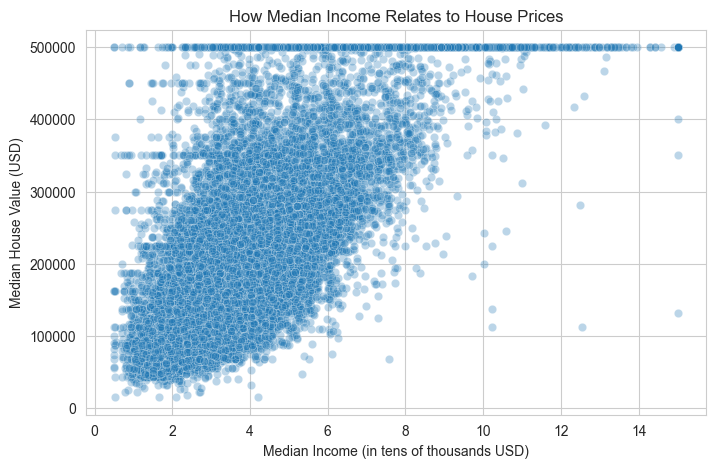

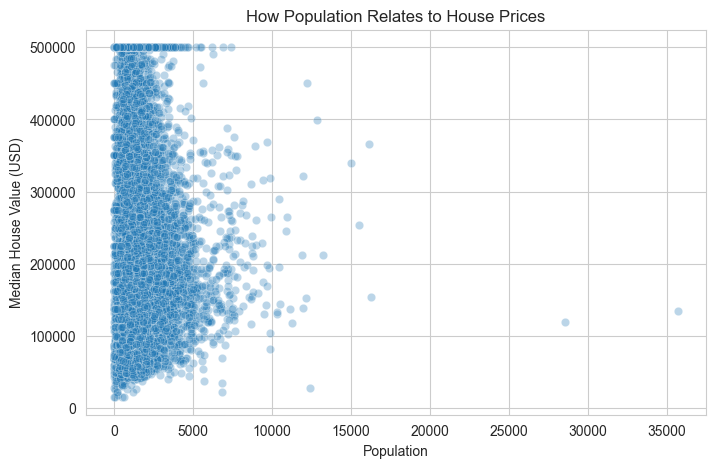

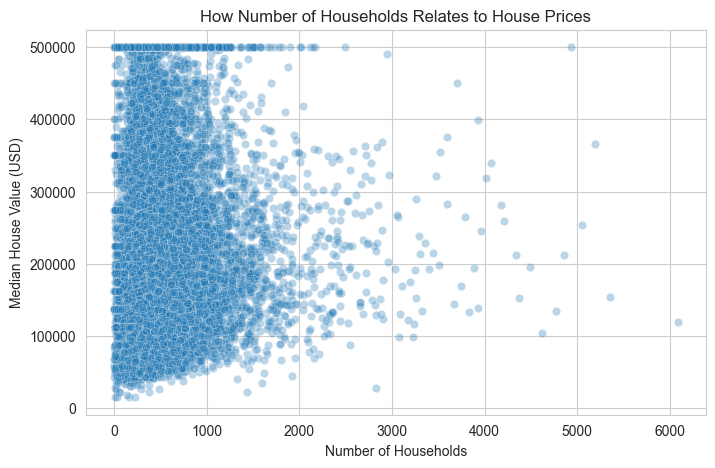

In [4]:
# Function to create scatter plots with clear titles and labels
def scatter_plot(x, y, xlabel, ylabel, title):
    plt.figure(figsize=(8,5))
    sns.scatterplot(x=x, y=y, alpha=0.3)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

# Plot 1: Median house price vs Median income
scatter_plot(
    housing['median_income'], 
    housing['median_house_value'], 
    'Median Income (in tens of thousands USD)', 
    'Median House Value (USD)', 
    'How Median Income Relates to House Prices'
)

# Plot 2: Median house price vs Population
scatter_plot(
    housing['population'], 
    housing['median_house_value'], 
    'Population', 
    'Median House Value (USD)', 
    'How Population Relates to House Prices'
)

# Plot 3: Median house price vs Number of households
scatter_plot(
    housing['households'], 
    housing['median_house_value'], 
    'Number of Households', 
    'Median House Value (USD)', 
    'How Number of Households Relates to House Prices'
)


**Quick explanation of variables we’re using:**  
- **Median House Value:** This is what we want to predict — the typical price of homes in the area.  
- **Median Income:** Average income of residents in that area, measured in tens of thousands of dollars.  
- **Population:** How many people live in each neighborhood.  
- **Households:** The number of homes or families living in the neighborhood.

From the plots, you can start to see which variables might have a stronger relationship with house prices.


# 4. Building Our Models

Now, let’s build three separate linear regression models, each trying to predict median house price from one factor: median income, population, and number of households.  

This helps us figure out which factor gives the most reliable prediction.


In [5]:
# Function to train a linear regression model and calculate key metrics
def fit_evaluate_linreg(x, y):
    x = x.values.reshape(-1,1)  # Reshape for sklearn
    y = y.values
    model = LinearRegression()
    model.fit(x, y)
    y_pred = model.predict(x)
    intercept = model.intercept_
    slope = model.coef_[0]
    mse = mean_squared_error(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    return model, intercept, slope, mse, mae, y_pred

# Variables to test
X_vars = ['median_income', 'population', 'households']
y = housing['median_house_value']

results = []

for var in X_vars:
    model, intercept, slope, mse, mae, y_pred = fit_evaluate_linreg(housing[var], y)
    results.append({
        'Variable': var,
        'Intercept': intercept,
        'Slope': slope,
        'MSE': mse,
        'MAE': mae,
        'y_pred': y_pred
    })


# 5. Summary of Our Models

Here’s a quick summary table showing the key results from each model: the formula parameters (intercept and slope) and error scores (MSE and MAE).  

These errors tell us how close our predictions are to the actual house prices.


In [6]:
# Show summary table for easy comparison
summary_df = pd.DataFrame(results)
summary_df = summary_df[['Variable', 'Intercept', 'Slope', 'MSE', 'MAE']]
summary_df


,Variable,Intercept,Slope,MSE,MAE
0,median_income,45085.576703,41793.849202,7.011312e+09,62625.933791
1,population,210436.262076,-2.511753,1.330741e+10,91153.820095
2,households,196928.577162,19.872775,1.325778e+10,90802.743243


# 6. Visualizing the Models

Next, let’s look at the data points and the regression lines our models found.  

Each plot includes the regression line along with the intercept, slope, and error scores to help us understand the fit visually.


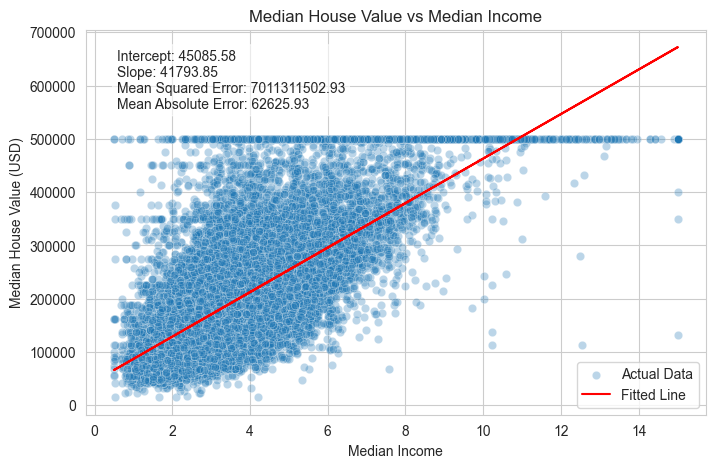

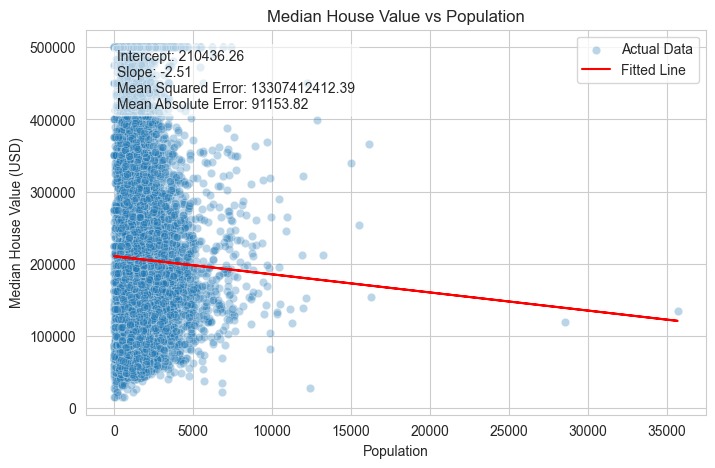

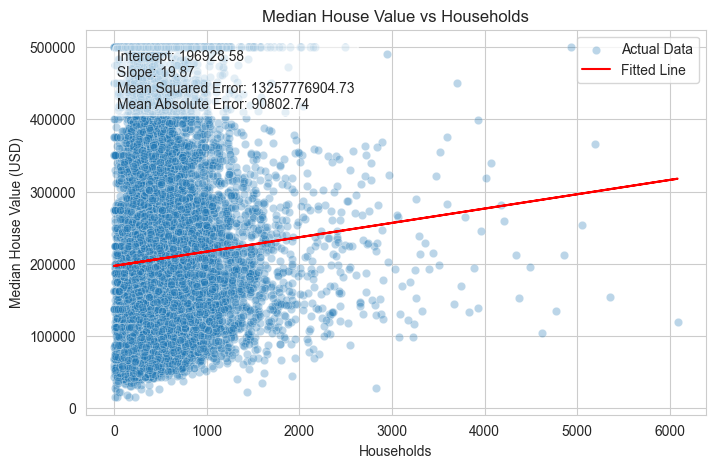

In [7]:
for res in results:
    x = housing[res['Variable']]
    y_pred = res['y_pred']
    
    plt.figure(figsize=(8,5))
    sns.scatterplot(x=x, y=y, alpha=0.3, label='Actual Data')
    plt.plot(x, y_pred, color='red', label='Fitted Line')
    
    plt.title(f"Median House Value vs {res['Variable'].replace('_',' ').title()}")
    plt.xlabel(res['Variable'].replace('_',' ').title())
    plt.ylabel("Median House Value (USD)")
    
    textstr = '\n'.join((
        f"Intercept: {res['Intercept']:.2f}",
        f"Slope: {res['Slope']:.2f}",
        f"Mean Squared Error: {res['MSE']:.2f}",
        f"Mean Absolute Error: {res['MAE']:.2f}",
    ))
    plt.gca().text(0.05, 0.95, textstr, transform=plt.gca().transAxes, 
                   fontsize=10, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.6))
    
    plt.legend()
    plt.show()


# 7. What Did We Learn?

To sum up:  

- Which variable gave us the best predictions of house prices?  
- How well did each model perform in terms of error scores?  
- Did anything surprise us in the data or results?  
- What should decision-makers take away from this analysis?  
- What could be the next steps to improve predictions or explore further?
